# GEOG696C Spatiotemporal Data Analysis
## Homework #2
Alex Saunders | Last updated: 20 September 2023

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
from datetime import datetime
import calendar
import scipy
import xarray
# import matplotlib.ticker as ticker
# from matplotlib.ticker import MultipleLocator

In [4]:
# Set the root path
# rootPath = Path('C:/Users/alexa/Documents/GitHub/dissertation/dissertation')
rootPath = Path('C:/Users/alexsaunders/Documents/01_uoa/04_git/spatiotemporal_data_analysis/00_hw')
dataPath = Path('C:/Users/alexsaunders/Documents/01_uoa/01_study/2023/geog696c/data')

## 1. Load the netcdf data 'HadISST'

In [34]:
sstData = xarray.open_dataset(dataPath/'HadISST_sst.nc') 
sst = sstData.sst

In [35]:
sst

<xarray.DataArray 'sst' (time: 1840, latitude: 180, longitude: 360)>
[119232000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2023-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [36]:
# Set missing values to na
sst = sst.where(sst>=0, np.nan)

## 2. Extract the data in the domain used by Deser and Blackmon (1995)
Pacific Ocean, latitude from 60oN to 20oS, and longitude from 120oE to -100oW (260oE)

In [37]:
# # First transform the coord system from -180to180 longitude, to 0to360 degrees
sst = sst.assign_coords(longitude=(sst.longitude % 360))

# have to also sort the coordinates and associated data so they are in the correct order from 0 to 360
sst = sst.sortby(sst.longitude)

print(sst.longitude.min(), sst.longitude.max())

<xarray.DataArray 'longitude' ()>
array(0.5, dtype=float32) <xarray.DataArray 'longitude' ()>
array(359.5, dtype=float32)


In [38]:
sst

<xarray.DataArray 'sst' (time: 1840, latitude: 180, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2023-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [39]:
# Specify the desired area, and find corresponding start and end lat/lons that are present in the data
lons=[120, 260]
lats=[60, -20]

# lon_start = sst['longitude'].sel(longitude=lons[0], method='nearest').values
# lon_end = sst['longitude'].sel(longitude=lons[1], method='nearest').values
# lat_start = sst['longitude'].sel(longitude=lats[0], method='nearest').values
# lat_end = sst['longitude'].sel(longitude=lats[1], method='nearest').values

# Now extract only the desired area
# sst = sst.sel(longitude=slice(lon_start, lon_end), latitude=slice(lat_start, lat_end))
sst = sst.sel(longitude=slice(lons[0], lons[1]), latitude=slice(lats[0], lats[1]))

In [40]:
sst.shape

(1840, 80, 140)

In [159]:
sst.latitude

<xarray.DataArray 'latitude' (latitude: 80)>
array([ 59.5,  58.5,  57.5,  56.5,  55.5,  54.5,  53.5,  52.5,  51.5,  50.5,
        49.5,  48.5,  47.5,  46.5,  45.5,  44.5,  43.5,  42.5,  41.5,  40.5,
        39.5,  38.5,  37.5,  36.5,  35.5,  34.5,  33.5,  32.5,  31.5,  30.5,
        29.5,  28.5,  27.5,  26.5,  25.5,  24.5,  23.5,  22.5,  21.5,  20.5,
        19.5,  18.5,  17.5,  16.5,  15.5,  14.5,  13.5,  12.5,  11.5,  10.5,
         9.5,   8.5,   7.5,   6.5,   5.5,   4.5,   3.5,   2.5,   1.5,   0.5,
        -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,  -8.5,  -9.5,
       -10.5, -11.5, -12.5, -13.5, -14.5, -15.5, -16.5, -17.5, -18.5, -19.5],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 59.5 58.5 57.5 56.5 ... -16.5 -17.5 -18.5 -19.5
Attributes:
    units:          degrees_north
    long_name:      Latitude
    standard_name:  latitude

In [41]:
sst

<xarray.DataArray 'sst' (time: 1840, latitude: 80, longitude: 140)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [29.362446, 29.487097, 29.582   , ..., 23.577778, 23.453806,
         23.31004 ],
        [29.349419, 29.494856,       nan, ..., 23.556343, 23.443325,
         23.320164],
        [29.328918,       nan,       nan, ..., 23.578579, 23.463644,
         23.336973]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [30.66763 , 30.466814, 30.153542, ..., 24.475985, 24.368017,
         24.316048],
        [30.661644, 30.444641,       nan, ..., 24.50286 , 24.387665,
         24.33868 ],
        [30.688522,       nan,       nan, ..., 24.679466, 24.54036 ,
         24.46276 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [29.549414, 29.437786, 29.236914, ..., 24.836254, 24.720978,
         24.571827],
        [29.519018, 29.374123,       nan, ..., 24.84084 , 24.749306,
         24.610146],
        [29.564308,       nan,       nan, ..., 24.875479, 24.788921,
         24.650368]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2023-0...
  * latitude   (latitude) float32 59.5 58.5 57.5 56.5 ... -17.5 -18.5 -19.5
  * longitude  (longitude) float32 120.5 121.5 122.5 123.5 ... 257.5 258.5 259.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

## 3. Create a 5-month (NDJBM) seasonal mean for all locations and years

In [42]:
# We use the rolling mean technique, with window of 5 months, taking only the ones ending in March
sstRolling = sst.rolling(time = 5).mean(skipna=True)

# Select March to get the average over NDJFM
endMo=3
sstSeasonal = sstRolling[sstRolling.time.dt.month==endMo]

In [43]:
sst.time

<xarray.DataArray 'time' (time: 1840)>
array(['1870-01-16T11:59:59.505615234', '1870-02-14T23:59:59.340820312',
       '1870-03-16T11:59:59.340820312', ..., '2023-02-16T12:00:00.000000000',
       '2023-03-16T12:00:00.000000000', '2023-04-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2023-04-...
Attributes:
    long_name:      Time
    standard_name:  time

In [44]:
# Drop the first which is an incomplete year
sstSeasonal = sstSeasonal.drop_isel(time=[0])

In [45]:
sstSeasonal.time

<xarray.DataArray 'time' (time: 153)>
array(['1871-03-16T12:00:00.000000000', '1872-03-16T12:00:00.000000000',
       '1873-03-16T12:00:00.000000000', '1874-03-16T12:00:00.000000000',
       '1875-03-16T12:00:00.000000000', '1876-03-16T12:00:00.000000000',
       '1877-03-16T12:00:00.000000000', '1878-03-16T12:00:00.000000000',
       '1879-03-16T12:00:00.000000000', '1880-03-16T12:00:00.000000000',
       '1881-03-16T12:00:00.000000000', '1882-03-16T12:00:00.000000000',
       '1883-03-16T12:00:00.000000000', '1884-03-16T12:00:00.000000000',
       '1885-03-16T12:00:00.000000000', '1886-03-16T12:00:00.000000000',
       '1887-03-16T12:00:00.000000000', '1888-03-16T12:00:00.000000000',
       '1889-03-16T12:00:00.000000000', '1890-03-16T12:00:00.000000000',
       '1891-03-16T12:00:00.000000000', '1892-03-16T12:00:00.000000000',
       '1893-03-16T12:00:00.000000000', '1894-03-16T12:00:00.000000000',
       '1895-03-16T12:00:00.000000000', '1896-03-16T12:00:00.000000000',
       '1897-03-16T12:00:00.000000000', '1898-03-16T12:00:00.000000000',
       '1899-03-16T12:00:00.000000000', '1900-03-16T12:00:00.000000000',
       '1901-03-16T12:00:00.000000000', '1902-03-16T12:00:00.000000000',
       '1903-03-16T12:00:00.000000000', '1904-03-16T12:00:00.000000000',
       '1905-03-16T12:00:00.000000000', '1906-03-16T12:00:00.000000000',
       '1907-03-16T12:00:00.000000000', '1908-03-16T12:00:00.000000000',
       '1909-03-16T12:00:00.000000000', '1910-03-16T12:00:00.000000000',
       '1911-03-16T12:00:00.000000000', '1912-03-16T12:00:00.000000000',
       '1913-03-16T12:00:00.000000000', '1914-03-16T12:00:00.000000000',
       '1915-03-16T12:00:00.000000000', '1916-03-16T12:00:00.000000000',
       '1917-03-16T12:00:00.000000000', '1918-03-16T12:00:00.000000000',
       '1919-03-16T12:00:00.000000000', '1920-03-16T12:00:00.000000000',
       '1921-03-16T12:00:00.000000000', '1922-03-16T12:00:00.000000000',
       '1923-03-16T12:00:00.000000000', '1924-03-16T12:00:00.000000000',
       '1925-03-16T12:00:00.000000000', '1926-03-16T12:00:00.000000000',
       '1927-03-16T12:00:00.000000000', '1928-03-16T12:00:00.000000000',
       '1929-03-16T12:00:00.000000000', '1930-03-16T12:00:00.000000000',
       '1931-03-16T12:00:00.000000000', '1932-03-16T12:00:00.000000000',
       '1933-03-16T12:00:00.000000000', '1934-03-16T12:00:00.000000000',
       '1935-03-16T12:00:00.000000000', '1936-03-16T12:00:00.000000000',
       '1937-03-16T12:00:00.000000000', '1938-03-16T12:00:00.000000000',
       '1939-03-16T12:00:00.000000000', '1940-03-16T12:00:00.000000000',
       '1941-03-16T12:00:00.000000000', '1942-03-16T12:00:00.000000000',
       '1943-03-16T12:00:00.000000000', '1944-03-16T12:00:00.000000000',
       '1945-03-16T12:00:00.000000000', '1946-03-16T12:00:00.000000000',
       '1947-03-16T12:00:00.000000000', '1948-03-16T12:00:00.000000000',
       '1949-03-16T12:00:00.000000000', '1950-03-16T12:00:00.000000000',
       '1951-03-16T12:00:00.000000000', '1952-03-16T12:00:00.000000000',
       '1953-03-16T12:00:00.000000000', '1954-03-16T12:00:00.000000000',
       '1955-03-16T12:00:00.000000000', '1956-03-16T12:00:00.000000000',
       '1957-03-16T12:00:00.000000000', '1958-03-16T12:00:00.000000000',
       '1959-03-16T12:00:00.000000000', '1960-03-16T12:00:00.000000000',
       '1961-03-16T12:00:00.000000000', '1962-03-16T12:00:00.000000000',
       '1963-03-16T12:00:00.000000000', '1964-03-16T12:00:00.000000000',
       '1965-03-16T12:00:00.000000000', '1966-03-16T12:00:00.000000000',
       '1967-03-16T12:00:00.000000000', '1968-03-16T12:00:00.000000000',
       '1969-03-16T12:00:00.000000000', '1970-03-16T12:00:00.000000000',
       '1971-03-16T12:00:00.000000000', '1972-03-16T12:00:00.000000000',
       '1973-03-16T12:00:00.000000000', '1974-03-16T12:00:00.000000000',
       '1975-03-16T12:00:00.000000000', '1976-03-16T12:00:00.000000000',
       '1977-03-16T12:00:00.000000000', '1978-03-16T12:00:00.000000000',
       '1979-03-16T1

## 4. Reshape from 3D (time, lat, lon) to a 2D matrix (m years and n locations)

In [46]:
print('m = {0} years from {1} to {2}'.format(len(sstSeasonal.time), sstSeasonal.time.dt.year.min().values, sstSeasonal.time.dt.year.max().values))
print('n = {0} locations'.format(len(sstSeasonal.latitude)*len(sstSeasonal.longitude)))

m = 153 years from 1871 to 2023
n = 11200 locations


In [47]:
# Convert to np array for reshaping
sstMat = np.array(sstSeasonal).reshape(len(sstSeasonal.time), len(sstSeasonal.latitude)*len(sstSeasonal.longitude), order='F')
print(sstMat.shape)

(153, 11200)


## 5. Filter out locations with missing values

In [48]:
sstMat = sstMat[:, ~np.isnan(sstMat).any(axis=0)]

In [49]:
sstMat

array([[ 6.5015244,  7.8000016,  8.951718 , ..., 23.10535  , 23.136108 ,
        23.180332 ],
       [ 6.765481 ,  8.045103 ,  9.04123  , ..., 22.694199 , 22.77336  ,
        22.841782 ],
       [ 7.9085817,  9.106554 , 10.019312 , ..., 22.708248 , 22.765009 ,
        22.822231 ],
       ...,
       [ 8.638316 ,  9.769423 , 10.773308 , ..., 22.505037 , 22.519543 ,
        22.554447 ],
       [ 8.586641 ,  9.719165 , 10.88368  , ..., 22.399204 , 22.397913 ,
        22.431263 ],
       [ 8.725103 ,  9.891211 , 10.827832 , ..., 23.072166 , 23.094563 ,
        23.131716 ]], dtype=float32)

In [50]:
print(sstMat.shape)

(153, 9329)


## 6. Remove the mean from each location

In [51]:
# Get the mean and subtract it from the yearly seasonal average values, at ech location
sstAnom = sstMat - sstMat.mean(axis=0)
sstAnom

array([[-0.81125546, -0.73909235, -0.49568653, ..., -0.18889809,
        -0.17726326, -0.16753197],
       [-0.5472989 , -0.4939909 , -0.40617466, ..., -0.60005   ,
        -0.54001236, -0.50608253],
       [ 0.59580183,  0.56746006,  0.57190704, ..., -0.58600044,
        -0.54836273, -0.52563286],
       ...,
       [ 1.3255363 ,  1.2303286 ,  1.3259029 , ..., -0.7892113 ,
        -0.79382896, -0.793417  ],
       [ 1.2738614 ,  1.1800709 ,  1.4362755 , ..., -0.8950443 ,
        -0.9154587 , -0.9166012 ],
       [ 1.4123235 ,  1.3521166 ,  1.3804274 , ..., -0.22208214,
        -0.21880913, -0.21614838]], dtype=float32)

In [53]:
sstAnom.shape

(153, 9329)

## 7. Calculate the covariance matrix

In [60]:
sstCov = np.cov(sstAnom, rowvar=False, ddof=1)

In [61]:
sstCov

array([[ 0.75478055,  0.67901275,  0.66249208, ..., -0.02827286,
        -0.03733003, -0.04393973],
       [ 0.67901275,  0.6160222 ,  0.60980808, ..., -0.02838312,
        -0.03563743, -0.0401821 ],
       [ 0.66249208,  0.60980808,  0.64223912, ..., -0.04159707,
        -0.04758826, -0.04949792],
       ...,
       [-0.02827286, -0.02838312, -0.04159707, ...,  0.17296241,
         0.17751714,  0.17934898],
       [-0.03733003, -0.03563743, -0.04758826, ...,  0.17751714,
         0.1858235 ,  0.19038603],
       [-0.04393973, -0.0401821 , -0.04949792, ...,  0.17934898,
         0.19038603,  0.1982178 ]])

In [62]:
sstCov.shape

(9329, 9329)

## 8. Calculate the leading 2 eigenvectors (k=2)
Using scipy

In [64]:
U, s, Vt = scipy.sparse.linalg.svds(sstCov, k=2)
# eigenvals = s**2

In [65]:
print(U.shape)
print(s.shape)
print(Vt.shape)

(9329, 2)
(2,)
(2, 9329)


In [66]:
# Check orthogonal
np.dot(U[:,0],U[:,1])

7.632783294297951e-17

In [117]:
U.shape

(9329, 2)

In [128]:
sstSeasonal.shape[1:]

(80, 140)

In [160]:
# Retrieve the years, and the location lat lons (excluding the missing value locations)
years = range(sstSeasonal.time.dt.year.min().values, sstSeasonal.time.dt.year.max().values)

sstMatOrig=np.array(sstSeasonal).reshape(len(sstSeasonal.time), len(sstSeasonal.latitude)*len(sstSeasonal.longitude), order='F')
missingLocs = ~np.isnan(sstMatOrig).any(axis=0)
locLats=[]
locLons=[]
allLats=[]
allLons=[]
i=0
for lat in sstSeasonal.latitude.values:
    for lon in sstSeasonal.longitude.values:
        if missingLocs[i]==True:
            locLats.append(lat)
            locLons.append(lon)
        allLats.append(lat)
        allLons.append(lon)
        i=i+1
        
latitudes = sst.latitude
longitudes = sst.longitude

In [136]:
U.shape

(9329, 2)

In [144]:
# Create the eofs, with dimensions of the original lat lon grid
eofs = np.zeros([sstSeasonal.shape[1]*sstSeasonal.shape[2], 2]) * np.nan # 2D
eofs[missingLocs, :] = U
eofs = eofs.reshape([sstSeasonal.shape[1], sstSeasonal.shape[2], 2], order='F')

In [145]:
eofs.shape

(80, 140, 2)

## 9. Calculate the signals by multiplying the centered data matrix by the eigenvectors

In [67]:
pcs = sstAnom @ U
print(pcs.shape)

(153, 2)


## 10. Calculate the explained variance accounted for the the two leading modes

In [69]:
# Get the total variance
totalVar = np.sum(np.var(sstAnom, axis=0, ddof=1))
totalVarSvd = np.sum(s)
print(totalVar, totalVarSvd)

2558.7202 1630.1986411467992


In [70]:
s

array([ 549.93106759, 1080.26757356])

In [71]:
# We see that it is has return the second mode first (not in order of highest contribution)

In [73]:
# Var explained by two leading modes as a % of total variance
expVar = np.round((s/totalVar * 100))

In [74]:
expVar

array([21., 42.])

In [75]:
print('Total variance: {0:0.2f} \nVariance explained by first mode: {1}% \nVariance explained by second mode: {2}%'.format(totalVar, expVar[1], expVar[0]))

Total variance: 2558.72 
Variance explained by first mode: 42.0% 
Variance explained by second mode: 21.0%


## 11. Plot a map of the spatial patterns for both EOF1 and EOF2

#### Plot with cartopy, EOFs separately

In [87]:
import cartopy # base Cartopy
import cartopy.crs as ccrs # shortcut to the coordinate reference system
import cartopy.feature as cfeature # add map features

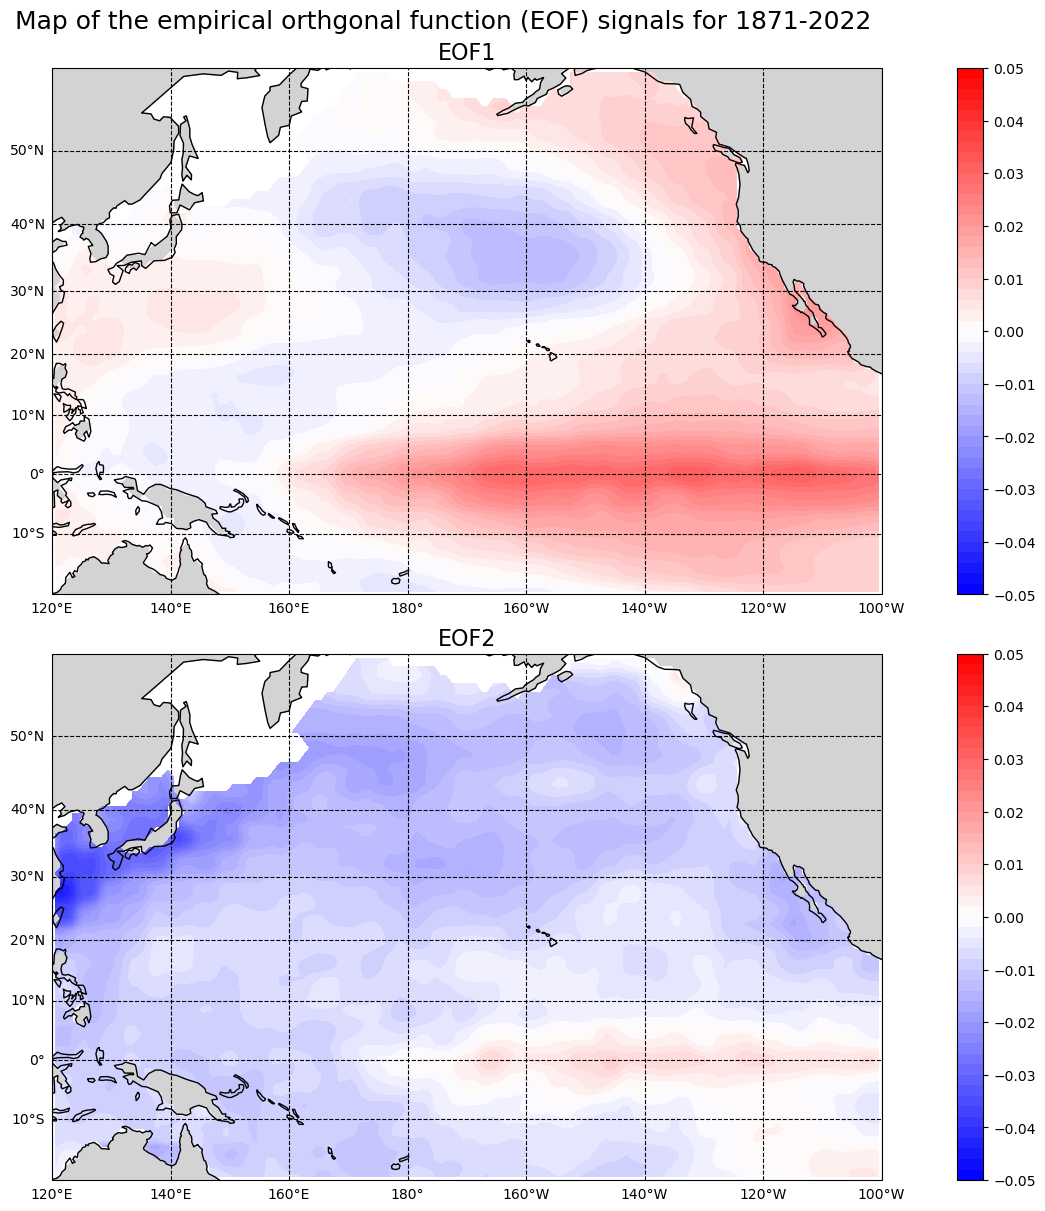

In [171]:
levels = np.linspace(-0.05, 0.05, 51)

fig, axes = plt.subplots(2, 1, figsize=(12,12), constrained_layout=True, subplot_kw={'projection': ccrs.Miller(central_longitude=260)})

fig.suptitle('Map of the empirical orthgonal function (EOF) signals for {0}-{1}'.format(min(years), max(years)), fontsize=18)

# EOF1
ax=axes[0]
ax.set_title('EOF1', fontsize=16)
ax.coastlines(color="black") 
ax.add_feature(cfeature.LAND, color='lightgray')
ax.set_extent([lons[0], lons[1], lats[1], lats[0]], crs=ccrs.PlateCarree())
gl1 = ax.gridlines(color='k', linestyle='--', draw_labels=["left", "bottom"], x_inline=False,
                  y_inline=False, ylocs=[-10, 0, 10, 20, 30, 40, 50, 60], xlocs=[120, 140, 160, 180, -160, -140, -120, -100])
eof1Plot = ax.contourf(longitudes, latitudes, eofs[:,:,1], cmap='bwr', levels=levels,vmin=-0.05, vmax=0.05, transform=ccrs.PlateCarree()) 
cb1 = plt.colorbar(eof1Plot, orientation='vertical', ticks=np.linspace(-0.05, 0.05, 11))

# EOF2
ax=axes[1]
ax.set_title('EOF2', fontsize=16)
ax.coastlines(color="black") 
ax.add_feature(cfeature.LAND, color='lightgray')
ax.set_extent([lons[0], lons[1], lats[1], lats[0]], crs=ccrs.PlateCarree())
gl1 = ax.gridlines(color='k', linestyle='--', draw_labels=["left", "bottom"], x_inline=False,
                  y_inline=False, ylocs=[-10, 0, 10, 20, 30, 40, 50, 60], xlocs=[120, 140, 160, 180, -160, -140, -120, -100])
eof2Plot = ax.contourf(longitudes, latitudes, eofs[:,:,0], cmap='bwr', levels=levels,vmin=-0.05, vmax=0.05, transform=ccrs.PlateCarree()) 
cb1 = plt.colorbar(eof2Plot, orientation='vertical', ticks=np.linspace(-0.05, 0.05, 11))

ax.set_aspect('equal')

plt.show()

## 12. Plot the time series of the signals for EOF1 and EOF2

In [166]:
# Create a dataframe with EOF1 and 2 time series by year
eofTimeSeriesDF = pd.DataFrame(data=[years, pcs[:,1], pcs[:,0]], index= ['year', 'eof1', 'eof2']).T

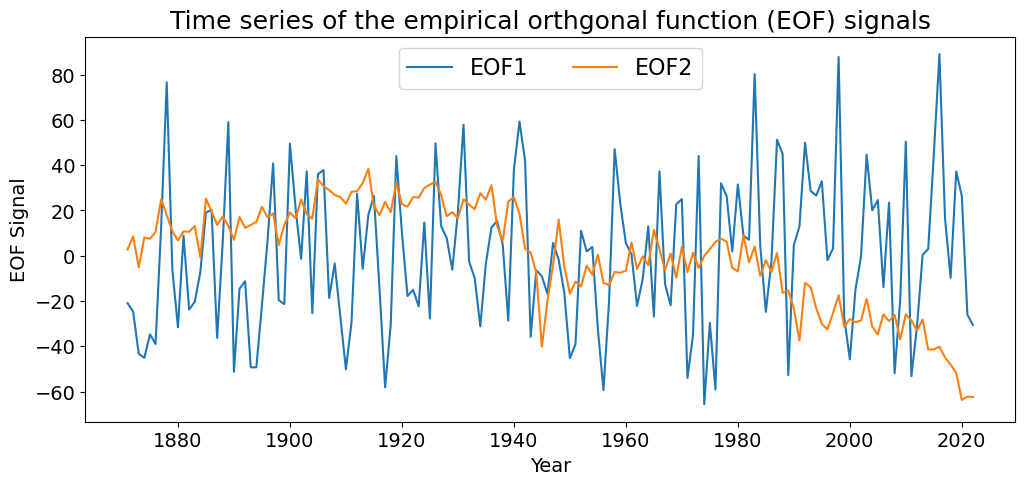

In [168]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_title('Time series of the empirical orthgonal function (EOF) signals', fontsize=18)

ax.plot(eofTimeSeriesDF.year, eofTimeSeriesDF.eof1, label='EOF1')
ax.plot(eofTimeSeriesDF.year, eofTimeSeriesDF.eof2,  label='EOF2')

ax.tick_params(which='both', labelsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EOF Signal', fontsize=14)

ax.legend(fontsize=16, ncol=2)


plt.show()

## How does it compare with Deser and Blackmon (1995)?

We see fairly close agreement in the spatial pattern of the EOFs with that of Deser and Blackmon. In the first mode, the spatial pattern appears very similar. The spatial patterns are less similar in the second mode. We have used a more recent dataset with a longer historical record comprising years 1871-2022, versus Desr and Blackmon were limited to 1950-1991 data. It makes sense then that the second mode, which captures longer term trends (the first mode being interannual variability), would differ when using a different historical period. Particularly with the influece of climate change that has been even more pronounced since the turn of the century.